##### 06 지도학습 (회귀)

## 선형 회귀
**1. 선형회귀**

    - 단순 선형회귀와 다중 선형회귀가 있지만 흔히 사용하는 것은 다중 선형회귀입니다.
    - Feature가 한 개인 경우가 드물기 때문에 보통 feature가 두 개 이상인 다중 선형회귀를 만들게 됩니다.

**2. 비용함수**

    - 데이터와 모델 간의 거리를 계산합니다.비용함수(cost function) 또는 손실함수, 목적함수라 부르기도 합니다.오차(error)를 계산합니다.
    - (실제 값과 예측값의 차이)평균 제곱 오차를 최소화하는 파라미터를 찾습니다.

**3. 경사하강법**

    - 오차를 찾아 나가는 방식비용함수의 기울기 절대값이 가장 작은 지점을 찾아서 오차가 작은 모델을 만듭니다.

In [3]:
#라이브러리 불러오기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
# 데이터 생성
from sklearn.datasets import load_diabetes # 당뇨병 환자 데이터

def make_dataset():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop('target', axis=1), df['target'], test_size=0.2, random_state=1004)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = make_dataset()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [5]:
# train 샘플
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
152,-0.034575,0.050680,-0.000817,0.070073,0.039710,0.066952,-0.065491,0.108111,0.026714,0.073480
417,-0.052738,-0.044642,0.071397,-0.074528,-0.015328,-0.001314,0.004460,-0.021412,-0.046879,0.003064
172,0.041708,0.050680,0.071397,0.008101,0.038334,0.015909,-0.017629,0.034309,0.073410,0.085907
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
296,0.067136,-0.044642,-0.061174,-0.040099,-0.026336,-0.024487,0.033914,-0.039493,-0.056158,-0.059067


In [9]:
# 타겟 샘플
y_train.head()

152    292.0
417     55.0
172    295.0
438    104.0
296     89.0
Name: target, dtype: float64

<AxesSubplot:>

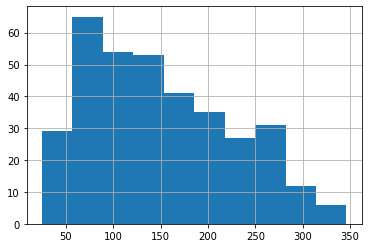

In [10]:
# 타겟 확인
y_train.hist()

### 선형회귀

In [12]:
#선형 회귀
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2707.6236708320466

### 릿지 회귀

In [21]:
# 릿지 회귀
from sklearn.linear_model import Ridge
model = Ridge(alpha = 1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

3522.1129142470336

In [24]:
# 회귀 계수
coef = pd.DataFrame(data = model.coef_, index= X_train.columns, columns=['alpha1'])
coef

,alpha1
age,31.293287
sex,-71.449580
bmi,267.605153
bp,197.364745
s1,14.613106
s2,-13.884790
s3,-124.649955
s4,106.212968
s5,221.068052
s6,101.202651


In [25]:
# 릿지 회귀 (alpha = 0)
model = Ridge(alpha = 10)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

5521.882311176061

In [26]:
# 회귀 계수 (alpha 10)
coef['alpha10'] = model.coef_
coef

,alpha1,alpha10
age,31.293287,16.703159
sex,-71.449580,-1.796452
bmi,267.605153,61.026348
bp,197.364745,47.435152
s1,14.613106,18.491225
s2,-13.884790,13.440080
s3,-124.649955,-35.542084
s4,106.212968,38.896129
s5,221.068052,55.276214
s6,101.202651,35.868345


In [33]:
# 릿지 회귀 (alpha = 0.05)
model = Ridge(alpha = 0.05)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2699.6575055293893

In [32]:
# 회귀 계수 (alpha 0.05)
coef['alpha0.05'] = model.coef_
coef

,alpha1,alpha10,alpha0.1,alpha0.05
age,31.293287,16.703159,4.274486,-0.509655
sex,-71.449580,-1.796452,-205.214645,-223.350550
bmi,267.605153,61.026348,450.905500,469.442823
bp,197.364745,47.435152,331.931307,348.377551
s1,14.613106,18.491225,-84.310050,-146.949652
s2,-13.884790,13.440080,-54.665887,-18.302744
s3,-124.649955,-35.542084,-158.707920,-141.660642
s4,106.212968,38.896129,114.068214,115.862762
s5,221.068052,55.276214,391.230355,432.505816
s6,101.202651,35.868345,78.555719,69.579039


### 라쏘 회귀

- **오버피팅 문제로 규제(regularization)를 적용한 모델**
- **규제 방식: L1 규제 (중요한 피처만 선택하는 특성)L2에 비해 회귀 계수를 급격히 감소시켜 중요하다고 생각하는 피처만 선택하고 나머지는 0으로 만듦**

In [34]:
# 라쏘 회귀
from sklearn.linear_model import Lasso
model = Lasso(alpha = 1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

4179.146884323723

In [36]:
# 회귀 계수
coef = pd.DataFrame(data = model.coef_, index= X_train.columns, columns=['alpha1'])
coef

,alpha1
age,0.000000
sex,-0.000000
bmi,343.588370
bp,46.375388
s1,0.000000
s2,0.000000
s3,-0.000000
s4,0.000000
s5,245.167660
s6,0.000000


In [38]:
# 라쏘 회귀 (alpha = 2)
from sklearn.linear_model import Lasso
model = Lasso(alpha = 2)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

6398.637179448666

In [39]:
# 회귀 계수 (alpha = 2)
coef['alpha2'] = model.coef_
coef

,alpha1,alpha2
age,0.000000,0.000000
sex,-0.000000,0.000000
bmi,343.588370,42.963888
bp,46.375388,0.000000
s1,0.000000,0.000000
s2,0.000000,0.000000
s3,-0.000000,-0.000000
s4,0.000000,0.000000
s5,245.167660,0.000000
s6,0.000000,0.000000


In [40]:
# 라쏘 회귀 (alpha = 0.05)
from sklearn.linear_model import Lasso
model = Lasso(alpha = 0.05)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2703.4553190372917

In [41]:
# 회귀 계수 (alpha = 0.05)
coef['alpha0.05'] = model.coef_
coef

,alpha1,alpha2,alpha0.05
age,0.000000,0.000000,-0.000000
sex,-0.000000,0.000000,-198.953867
bmi,343.588370,42.963888,487.192794
bp,46.375388,0.000000,340.499590
s1,0.000000,0.000000,-95.578630
s2,0.000000,0.000000,-0.000000
s3,-0.000000,-0.000000,-189.868586
s4,0.000000,0.000000,10.489156
s5,245.167660,0.000000,457.331482
s6,0.000000,0.000000,39.292945


### 엘라스틱넷 회귀

---

- **오버피팅 문제로 규제(regularization)를 적용한 모델**
- **규제 방식: L2 규제와 L1 규제 (중요한 피처만 선택하는 특성) 결합**
- **시간이 상대적으로 오래 걸림**

In [42]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha = 1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

6539.270795233337

In [47]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha = 0.0001, l1_ratio = 0.6)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2675.6005929972935

### 랜덤포레스트

In [48]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

3405.4939179775283

### Xgboost

In [70]:
# Xgboost
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

4028.2455020344587

### 하이퍼파라미터 튜닝

In [71]:
# 라이브러리 불러오기
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [72]:
# 하이퍼파라미터
params={'learning_rate':[0.07, 0.05], 
        'max_depth':[3, 5, 7], 
        'n_estimators':[100, 200],
        'subsample':[0.9, 0.8, 0.7]
        }

In [62]:
# 데이터셋 로드
def make_dataset2():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    return df.drop('target', axis=1), df['target']
X, y = make_dataset2()

### GridSearchCV

- GridSearchCV를 통해 최적의 하이퍼파라미터를 찾음(시간 오래 걸림)

In [74]:
# GridSearchCV
xgb = XGBRegressor()
grid = GridSearchCV(xgb, params, cv=3, n_jobs=-1)
grid.fit(X, y)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [75]:
# 최적의 파라미터를 찾음
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}

In [76]:
# 하이퍼파라미터 튜닝
xgb = XGBRegressor(
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 100,
    subsample = 0.7
)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
mean_squared_error(y_test, pred)

3173.045180496539

### RandomizedSearchCV

- RandomizedSearchCV 는 GridSearchCV와 달리 랜덤으로 N개의 조합만 탐색함(시간 내 최적의 하이퍼파라미터 탐색)

In [77]:
# Random Search
xgb = XGBRegressor()
grid = RandomizedSearchCV(xgb, params, cv=3, n_iter = 10, n_jobs=-1)
grid.fit(X, y)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                       

In [78]:
# 최적의 하이퍼파라미터를 찾음
grid.best_params_

{'subsample': 0.7, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.07}

## 평가(회귀)

---

- MAE(평균 절대 오차) : 실제 값과 예측 값 차이 > 절대값 평균
- MSE(평균 제곱 오차) : 실제 값과 예측 값 차이 > 제곱해 평균
- RMSE(MSE에 루트를 씌움) : MSE가 실제 오류보다 커지는 특성이 있어 루트를 활용함
- RMSLE(RMSE에 로그를 적용) : 예측값이 실제 값 보다 작을때 더 큰 패널티 부여(ex. 배달: 20분 예측했는데 40분 걸리면 문제가 됨)
- R2(결정계수) : 실제 값의 분산대비 예측 값의 분산 계산

In [84]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

47.57186281011346

In [85]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

3173.045180496539

In [86]:
# RMSE
import numpy as np
np.sqrt(mean_squared_error(y_test, pred))

56.32978945901129

In [88]:
# RMSLE
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_test, pred))

0.4359462312673838

In [89]:
# R2
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.5153820583895429